In [1]:
%%time
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
scalingFactor = 200
rxndiff=dict()

print('Starting scaling = ', scalingFactor)
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


#Growth rate = 3.0
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

gr_sim = dict()

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))


gr_dict = {'gr_1':gr_sim}

def computedElongationLatency_gr3_v2(gr25_ptRNA,gr25_pCodon,gr_dict):
    import numpy as np

    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

Starting scaling =  200
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 52.4 s, sys: 536 ms, total: 52.9 s
Wall time: 53.5 s


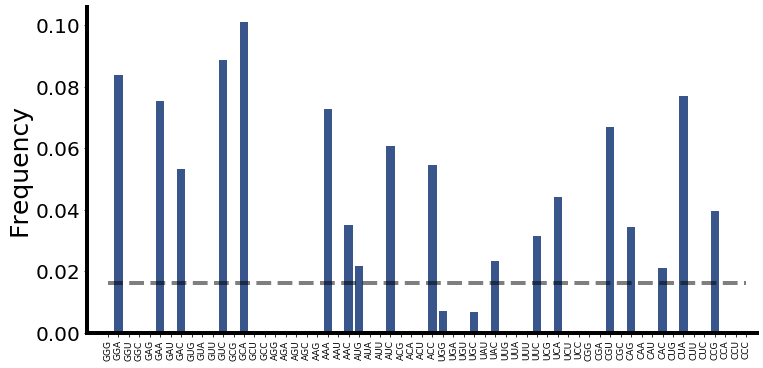

In [2]:
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


RED20_pCodon = pd.read_excel('codonValues_RED20.xlsx',header=None)
RED20_pCodon = RED20_pCodon[6]/sum(RED20_pCodon[6])
fig,ax = plt.subplots(figsize=(12,6))
ax.bar(np.arange(62),RED20_pCodon,color='#39568CFF',width=0.8)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=4,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)


for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

R^2 0.012763056936935468
0.09872810925426781


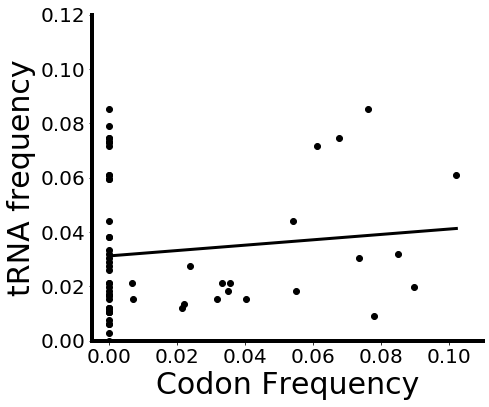

In [29]:
#### trna frequency vs codon frequency, ga slower (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)



ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,RED20_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.11)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

R^2 0.2109956937130476
0.5301603348821846


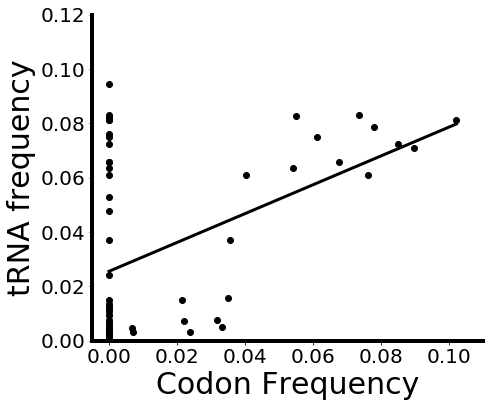

In [32]:
#### trna frequency vs codon frequency, ga faster (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


p_tRNA_list = np.load('RandomtRNA_FixedMinimalCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedMinimalCodon_1500sample_elong_t_list2.npy')
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_tRNA_list[np.argmin(elong_t_tRNA_list)],RED20_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.11)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

R^2 0.15021187902674105
-0.4030789823192539


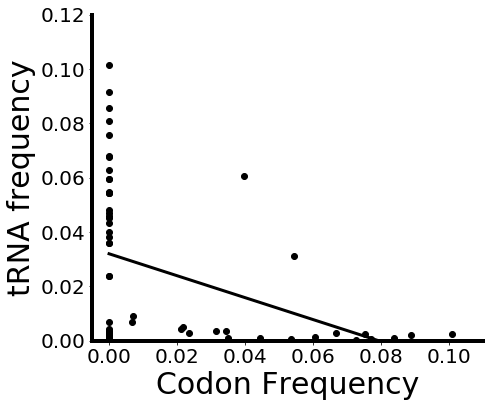

In [81]:
#### trna frequency vs codon frequency, ga slower (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


p_tRNA_list = np.load('RandomtRNA_FixedMinimalCodon_1500sample_p_tRNA_list2_slow.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedMinimalCodon_1500sample_elong_t_list2_slow.npy')
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_tRNA_list[np.argmax(elong_t_tRNA_list)],RED20_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.11)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

In [10]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga_tRNASweep_multithread(codon_arr,elong_arr,tRNA_arr,gr_dict,minRange,maxRange,fast=True,tRNA_shuffle_indices = np.arange(0,40)):
    import gc
    from joblib import Parallel, delayed
    import multiprocessing   
    num_cores = 16
    print(tRNA_shuffle_indices)
    #### Compute fitness
    if fast:
        fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))
    else:
        fitness = (np.array(elong_arr))/sum((np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    parent_indices = np.argpartition(fitness, n)[-n:]
    tRNA_arr=np.array(tRNA_arr)
    parents = tRNA_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(tRNA_shuffle_indices,recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(tRNA_shuffle_indices,mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])
        
        ### Add children to list
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        
    #### Compute elong_t of the recombined children, multithreaded
    inputs=[[recombined_children[i],codon_arr,gr_dict] for i in np.arange(len(couples)*2)]
    a = Parallel(n_jobs=num_cores,backend='loky')(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
    for _,items in enumerate(a):
        recombined_children_elongt.append(items[0][0])
#    del(a)
#    gc.collect()
    
    #### Have recombined children and their elong_t replaced culled candidates
    tRNA_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, tRNA_arr, elong_arr

def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

In [36]:
RED20_pCodon = pd.read_excel('codonValues_RED20.xlsx',header=None)
RED20_pCodon = RED20_pCodon[6]/sum(RED20_pCodon[6])

computedElongationLatency_gr3_v2_multithread([gr25_ptRNA,RED20_pCodon,gr_dict])

([199.19603861319248], [12.962447061567506])

In [ ]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(RED20_pCodon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA))
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedMinimalCodon_1500sample_elong_t_list2',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedMinimalCodon_1500sample_p_tRNA_list2',p_tRNA_list)
#np.save('minelong_arr2_tRNA_minimalCodon',minelong_arr)

In [35]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
maxelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(RED20_pCodon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA),False)
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    maxelong_arr.append(max(elong_t_tRNA_list))
np.save('RandomtRNA_FixedMinimalCodon_1500sample_elong_t_list2_slow',elong_t_tRNA_list)
np.save('RandomtRNA_FixedMinimalCodon_1500sample_p_tRNA_list2_slow',p_tRNA_list)
np.save('maxelong_arr2_tRNA_minimalCodon_slow',maxelong_arr)

0.010462027858860095
203.90277475184288
0.010821698795316633
206.24021597895904
0.010749975327841527
208.47982805805427
0.010675089855136504
210.1237345117109
0.010828524802981519
210.6142284156151
0.010755054152956075
211.28427799045505
0.01068601415709806
212.82697916567122
0.010620655199975187
213.7507271424333
0.010562587202844188
215.30479673257997
0.01051055247675581
216.80064409515586
0.010465320092501229
216.63695748605593
0.010427034514213816
219.78467955635756
0.010390273938075241
220.60914086083093
0.010352851511236995
222.11310959267422
0.01031911423573249
222.93012563779243
0.010284080207411336
221.72612192463637
0.010259733962137333
224.73357250577698
0.01023127947111252
225.8029635876979
0.010207074038238732
222.3908988121866
0.010194297400354588
224.04793917970954
0.010186104962774473
227.2739216654792
0.01017390676330392
226.3901438665828
0.010165390310453926
221.2653830800309
0.010159995489953855
229.15492207040853
0.010219761597546758
227.60404345527562
0.01022710014

0.010047738440994054
240.28236372390805
0.010069596397791779
240.39519394650597
0.01005782944689802
231.19507963521667
0.010063546134892493
240.01709064081143
0.010060280222027465
240.13784781946774
0.010051409960685036
237.83536559421046
0.010062969507946471
236.89409014233013
0.010058606728873787
241.43619804576383
0.010050339625368915
237.8009477934029
0.010062774677990912
244.63808076230487
0.010049809209096129
238.1671925733532
0.010063862974133581
239.2052734932034
0.010053908278580954
242.23799603253192
0.010052259185384833
241.01011059926896
0.01004637866397929
241.14135821670394
0.010044418904527392
245.90279236945568
0.010038881581864997
244.8934406901521
0.010040902958174858
242.33519875333744
0.01004215804058541
242.86022681206694
0.010046348166307766
238.90887266510197
0.010055309860007355
241.89728129731978
0.01005584615532982
241.45810248165833
0.010056843679927213
237.59801943869184
0.010053061049998042
238.16337848257228
0.01007013098941041
240.23958572795365
0.0100547

0.010032338379163832
244.02470842651448
0.010028924192723864
245.4553629316096
0.010022993571919872
244.93394947001602
0.010025952669679554
241.9774249847184
0.010029121046219464
243.7557412603165
0.01002615654531267
241.56036309902717
0.010034424817676068
240.39544678877274
0.010031345351336441
243.13853955516925
0.010025824212964033
246.89469805751372
0.010022639445514134
244.7721950566411
0.010023274304560346
242.09961480579028
0.010028904137907111
238.93995539836212
0.010027177005405164
239.88487112665155
0.010036012088089463
243.407732153489
0.010020928340077036
241.97908235395
0.010029566232460202
238.77463310630935
0.010033894709075895
239.69719996544265
0.010024601207218747
241.17407927041424
0.010032697795318664
240.17572902959384
0.010028369880533643
240.6132865065227
0.010020904361324615
245.24640713232682
0.01001697478644862
241.82811030932697
0.010024990027410436
243.74983754869018
0.010024925551461625
246.0203065603693
0.010027722836692905
243.2992044359966
0.010033524227

0.010019630943891366
241.56289881091237
0.010021671578024331
242.70138483059372
0.01002253466653939
242.44427455817006
0.010024834507948655
241.28950339942344
0.010034736092717985
242.48839347595933
0.010022242587212184
242.96275781689454
0.010027862711317689
247.4643554808201
0.010015985167273799
236.23087601389716
0.010022831307237615
243.59483256546767
0.010023469145715988
242.94483768216503
0.010025940996402062
244.76616810540088
0.010024777465114433
243.6576527464152
0.01001782188342281
239.85531156791473
0.010022258160604583
244.01986854479864
0.010023180378069995
244.14544730551486
0.010023631473911325
242.1721638998084
0.01002877880154266
242.67349561802055
0.010023194860096066
243.56485863595043
0.010022030805411296
244.4235058434802
0.010018994012882369
238.64255647650035
0.010037348764843
247.68450364506148
0.010016864960217454
243.4872581020104
0.010022089764844129
243.5524087972059
0.010020099802335845
243.25985823037757
0.010020424001029411
246.76474541405676
0.0100179524

0.010022302508927753
243.33704964315592
0.010023861601104606
242.5416193136226
0.010023800734098028
239.92689194491527
0.010027892720610412
243.67252109138752
0.010018174120183226
241.86372885451482
0.010022200207403005
243.53086750505426
0.01002026758722382
241.9294054465225
0.010022847659467848
240.77908708543674
0.010023299307274762
241.8053934519797
0.010016672778904574
242.8334634320322
0.01002181743095039
240.18073304870865
0.010025180287633743
242.03177171651464
0.010025515661389402
242.70523121329518
0.010019573051352064
240.802556693051
0.010019508261519545
241.9932535986967
0.010020431120500356
243.83866949401832
0.010027345403761032
237.65944283456295
0.010031103520174743
244.54980875121308
0.010016652249698197
246.5492055284552
0.010013800764246423
244.74491836556183
0.010017076436067755
235.44686360657082
0.010021648028056192
244.38815128175742
0.010018304920123327
244.23241075325723
0.010020789485460622
238.0075417044294
0.010023123173206142
241.68422531618597
0.010019043

0.010022773717239673
245.80000195909332
0.01001751232922579
248.65175154130736
0.010010758233648586
243.84987112353446
0.010016828804377454
244.0356651373376
0.010016706683407756
247.8651096708506
0.010014245136032144
245.05242303246666
0.010018559814364135
248.55371340013804
0.01000956518501087
240.00586879195075
0.010020392586127457
245.20055223399189
0.010018124955173255
243.2010299076506
0.010016010761976448
244.44894937886173
0.010017166792011591
243.9794238284214
0.01002003194422156
249.42273507381674
0.010010735122370343
241.108382055248
0.010012664679913583
240.20654482883887
0.010020605860311017
247.3866582161218
0.010012349933269755
235.9060615301653
0.01003547919474022
238.16306400593365
0.01003264848551072
247.8690968933777
0.010011385014874209
241.9823215077747
0.010016330952232652
241.52030235216546
0.010022928708377813
249.6311964805738
0.01000955427279034
247.82920894553087
0.010013054898838242
240.52691666702486
0.010019096460434196
243.76528677397596
0.010020610622724

0.010032201963796387
244.06221908084225
0.010021827788679856
241.59354820083513
0.010015795766167013
240.87345676968582
0.010028193471488636
243.0793423404769
0.010021151303997784
242.89203056294795
0.010023314821892844
245.85686858766238
0.010020052918850985
244.16782398441026
0.010024769318673661
243.53503598573064
0.010015157853191037
248.13386467804892
0.01001217237301174
244.62192016450425
0.010021633235306762
241.1891778915492
0.010021717498171961
241.50416899803136
0.010020502399471963
241.58754097276892
0.010023273583983913
242.15384863647094
0.010018350230039694
247.88014150683347
0.010017911553482934
248.6550777748503
0.010011341498865508
243.83014298101344
0.010020617528435085
238.0432491993681
0.010027925823979978
249.56936487712397
0.010011085237089743
244.8658660639483
0.010018050302425394
239.68281279081472
0.010023795768274073
242.7200389081122
0.010022136154334742
242.0542329329292
0.010028193977591878
239.65276994671854
0.010025455235307963
246.57175386441256
0.010014

0.010018918837676496
240.7188505229021
0.010030417853605355
238.29730245280922
0.010027586627418324
245.01187174988294
0.010016910020577044
243.99735180744293
0.010020925884209008
240.22150818511759
0.010021604203347977
243.8389351750408
0.01002166084924035
246.29702357529794
0.01001131741153386
247.01999955914198
0.010012086100245125
248.94535121485998
0.01001061134606504
244.6041954760697
0.010018035041775335
244.45736593601475
0.010020810524729378
243.59822950783655
0.010016671251569582
247.61200204861078
0.010012583813607617
239.66009702661663
0.01002690272336539
244.86217836379504
0.010011398067432722
242.60515004824742
0.010015291618309852
243.56618573270075
0.010018299685766337
244.2288714454482
0.010016312409430508
240.22359746802027
0.010018455988130002
245.14225518638648
0.010012281426827987
245.1462283962
0.010014785049196825
244.1455392187383
0.010017406061865027
247.89172063186405
0.010013249285550424
241.69749587979118
0.010024040084307904
240.46522570667594
0.01002350507

[ 0.02026998 -0.00679407 -0.00884652 -0.00546661 -0.00685658  0.00500704
  0.01584729  0.01937837 -0.01648421 -0.00577796 -0.00250171 -0.02413581
  0.04046833 -0.0688211   0.00301692  0.00351437 -0.06045162 -0.00726887
  0.06971114 -0.01697767 -0.00824441  0.052556   -0.00658033 -0.0074965
  0.0057963  -0.00533745  0.04014616 -0.00140737 -0.01626907  0.00377318
 -0.01249431 -0.01152673  0.06385238  0.00306939  0.00054069 -0.00787918
 -0.01204298 -0.0241765  -0.05407525  0.05096527]
1.8041124150158794e-16
normed tRNA dist  0.7958256315201571


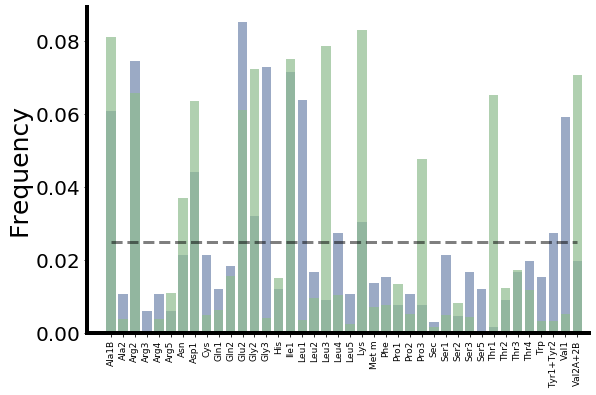

In [15]:
p_tRNA_list = np.load('RandomtRNA_FixedMinimalCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedMinimalCodon_1500sample_elong_t_list2.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']

fig,ax = plt.subplots(figsize=(9,6))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)],color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))


tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

[-0.05849327 -0.00693161 -0.07189448  0.03571075  0.04006444  0.05316168
 -0.02049944 -0.04328765 -0.01509835  0.05552528 -0.01496419 -0.08279579
 -0.03077984 -0.01774691 -0.00816145 -0.07010072 -0.00324878  0.03291002
 -0.00848074  0.00052126  0.04792615 -0.0301943  -0.00914911 -0.01193432
  0.05465046  0.05115893 -0.00739564  0.04863468 -0.02035933  0.02339553
  0.03341277  0.03081575 -0.00138213  0.02489308  0.01162502  0.02718009
 -0.0069632  -0.02498012 -0.02645616  0.01971166]
1.0408340855860843e-17
normed tRNA dist  1.1825950820226367


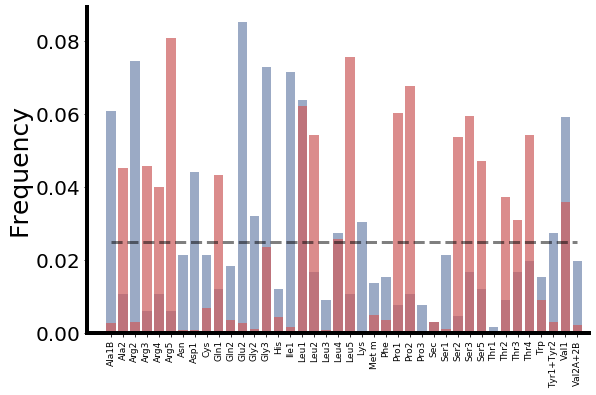

In [82]:
p_tRNA_list = np.load('RandomtRNA_FixedMinimalCodon_1500sample_p_tRNA_list2_slow.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedMinimalCodon_1500sample_elong_t_list2_slow.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']

fig,ax = plt.subplots(figsize=(9,6))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmax(elong_t_tRNA_list)],color='indianred',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))


tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

Text(0.5, 0, 'Epoch')

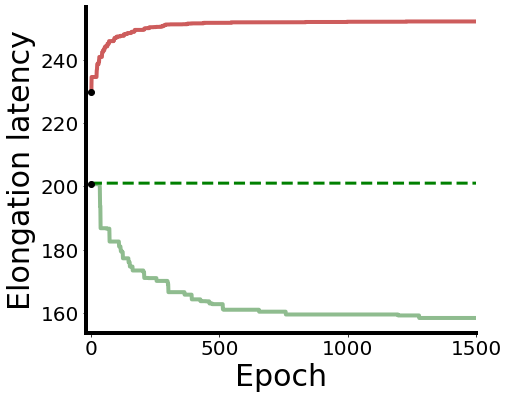

In [94]:
import matplotlib.pyplot as plt
import numpy as np
minelong = np.load('minelong_arr2_tRNA_minimalCodon.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(1500),minelong,linewidth=4,color='darkseagreen')
#ax.plot(np.arange(1500),[216.6]*1500,linewidth=3,color='black',linestyle='dashed')
ax.set_xlim(-20,1500)

maxelong_slow = np.load('maxelong_arr2_tRNA_minimalCodon_slow.npy')
ax.plot(np.arange(1500),maxelong_slow,linewidth=4,color='indianred')
ax.plot(np.arange(1500),[201]*1500,linewidth=3,color='green',linestyle='dashed')

ax.scatter([0],maxelong_slow[0],color='black',zorder=10)
ax.scatter([0],minelong[0],color='black',zorder=10)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency',fontsize=30)
ax.set_xlabel('Epoch',fontsize=30)

In [52]:
#### tRNA shuffling

from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_tRNA_list = list()
p_tRNA_list = list()
RED20_pCodon = pd.read_excel('codonValues_RED20.xlsx',header=None)
RED20_pCodon = RED20_pCodon[6]/sum(RED20_pCodon[6])
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


for i in range(10000):
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,RED20_pCodon,gr_dict);
    elong_t_tRNA_list.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)
    if(i%10==0):
        print(i)
    
#np.save('RandomtRNA_FixedMinimalCodon_10ksample_elong_t',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedMinimalCodon_10ksample_ptRNAlist',p_tRNA_list)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
204

In [83]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,RED20_pCodon,gr_dict)
print(elong_t, std)

elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,RED20_pCodon,gr_dict)
print(elong_t, std)

[216.6577016364067] [15.205893416727791]
[201.0069054871502] [13.291688077736458]


1.0746268656716418
216.28749487880273 4.88592624472585
z-score:  3.128883677952555
p-value 0.000877358790083361


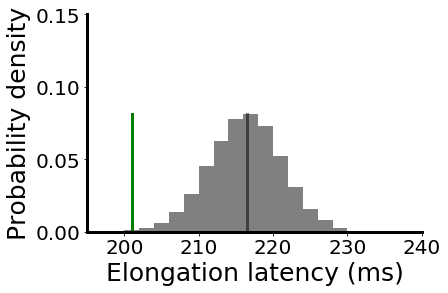

In [85]:
#### Plot tRNA shuffling
import matplotlib.pyplot as plt
import scipy.stats

elong_t_tRNA_list=np.load('RandomtRNA_FixedMinimalCodon_10ksample_elong_t.npy')

fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_tRNA_list,bins=15,range=(200,230),color='grey',density=True)
ax.plot([201]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([216.5]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)
print(216/201)
print(np.mean(elong_t_tRNA_list), np.std(elong_t_tRNA_list))
print('z-score: ', (np.mean(elong_t_tRNA_list)-201)/np.std(elong_t_tRNA_list))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_tRNA_list)-201)/np.std(elong_t_tRNA_list))))
for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(195,240)
    ax.set_xticks(np.arange(200,241,10))
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

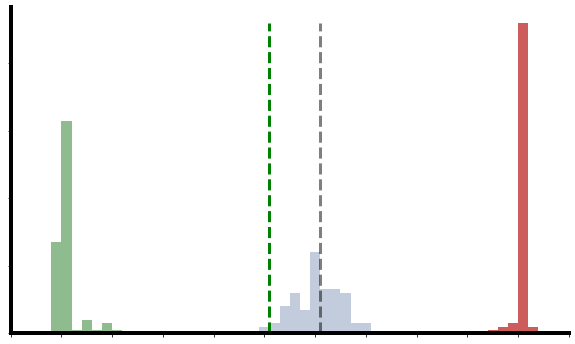

In [151]:
###Varying tRNA
fig,ax = plt.subplots(figsize=(10,6))

elong_t_tRNA_list=np.load('RandomtRNA_FixedMinimalCodon_1500sample_elong_t_list2.npy')
hist=ax.hist(elong_t_tRNA_list,15,range=(150,180),color='darkseagreen',density=True)

elong_t_tRNA_list=np.load('RandomtRNA_FixedMinimalCodon_1500sample_elong_t_list2_slow.npy')
hist=ax.hist(elong_t_tRNA_list,15,range=(240,270),color='indianred',density=True)

ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([201]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green',linestyle='dashed')


#p_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list.npy')
#elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_elong_t_list.npy')
#hist=ax.hist(elong_t_tRNA_list,15,range = (195,225),color='grey',density=True,alpha=0.2)

elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
hist=ax.hist(elong_t_tRNA_list,15,range = (195,225),color='#39568CFF',density=True,alpha=0.3)


for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(150,260)
    ax.set_xticks(np.arange(150,261,10))

In [25]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
maxelong_arr = list()
elong_t_tRNA_list_arr = list()
for i in range(1500):
    maxelong_arr.append(max(elong_t_tRNA_list))
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA))
    print(i)
    print(max(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    elong_t_tRNA_list_arr.append(elong_t_tRNA_list)
np.save('Slower_RandomtRNA_FixedCodon_1500sample_elong_t_list2',elong_t_tRNA_list)
np.save('Slower_RandomtRNA_FixedCodon_1500sample_p_tRNA_list2',p_tRNA_list)
np.save('Slower_maxelong_arr2-tRNA-faster',maxelong_arr)
np.save('Slower_RandomtRNA_FixedCodon_1500sample_elong_t_list2_arr-tRNA',elong_t_tRNA_list_arr)

0
220.3080518279649
1
220.3080518279649
2
223.81690929840056
3
227.4534425616802
4
227.4534425616802
5
227.4534425616802
6
227.4534425616802
7
227.4534425616802
8
227.4534425616802
9
227.4534425616802
10
227.4534425616802
11
227.4534425616802
12
227.4534425616802
13
227.4534425616802
14
227.78145670436936
15
227.78145670436936
16
227.78145670436936
17
227.78145670436936
18
227.78145670436936
19
227.78145670436936
20
227.78145670436936
21
227.78145670436936
22
227.78145670436936
23
227.78145670436936
24
229.529678036676
25
229.529678036676
26
229.529678036676
27
229.529678036676
28
230.47119627654712
29
230.47119627654712
30
230.47119627654712
31
230.47119627654712
32
230.47119627654712
33
230.47119627654712
34
231.1212818293384
35
231.1212818293384
36
231.1212818293384
37
231.1212818293384
38
231.1212818293384
39
231.1212818293384
40
231.3939603936741
41
232.06992281294458
42
232.85484355252112
43
232.85484355252112
44
234.34663737228362
45
234.34663737228362
46
234.34663737228362
47
2

365
244.15133834302404
366
244.15133834302404
367
244.15133834302404
368
244.15133834302404
369
244.15133834302404
370
244.15133834302404
371
244.15133834302404
372
244.15133834302404
373
244.15133834302404
374
244.15133834302404
375
244.15133834302404
376
244.15133834302404
377
244.15133834302404
378
244.15133834302404
379
244.15133834302404
380
244.15133834302404
381
244.15133834302404
382
244.15133834302404
383
244.15133834302404
384
244.15133834302404
385
244.15133834302404
386
244.15133834302404
387
244.15133834302404
388
244.15133834302404
389
244.15133834302404
390
244.6069302748368
391
244.6069302748368
392
244.6069302748368
393
244.6069302748368
394
244.6069302748368
395
244.6069302748368
396
244.6069302748368
397
244.6069302748368
398
244.6069302748368
399
244.6069302748368
400
244.6069302748368
401
244.6069302748368
402
244.6069302748368
403
244.6069302748368
404
244.6069302748368
405
244.6069302748368
406
244.6069302748368
407
244.6069302748368
408
244.6069302748368
409
244

731
246.34090645967245
732
246.34090645967245
733
246.34090645967245
734
246.34090645967245
735
246.34090645967245
736
246.34090645967245
737
246.34090645967245
738
246.34090645967245
739
246.34090645967245
740
246.34090645967245
741
246.34090645967245
742
246.34090645967245
743
246.34090645967245
744
246.34090645967245
745
246.34090645967245
746
246.34090645967245
747
246.34090645967245
748
246.34090645967245
749
246.34090645967245
750
246.34090645967245
751
246.34090645967245
752
246.34090645967245
753
246.34090645967245
754
246.34090645967245
755
246.34090645967245
756
246.34090645967245
757
246.34090645967245
758
246.34090645967245
759
246.34090645967245
760
246.34090645967245
761
246.34090645967245
762
246.34090645967245
763
246.34090645967245
764
246.34090645967245
765
246.34090645967245
766
246.34090645967245
767
246.34090645967245
768
246.34090645967245
769
246.34090645967245
770
246.34090645967245
771
246.34090645967245
772
246.34090645967245
773
246.34090645967245
774
246.340

1084
246.57757216101476
1085
246.57757216101476
1086
246.57757216101476
1087
246.57757216101476
1088
246.57757216101476
1089
246.57757216101476
1090
246.57757216101476
1091
246.57757216101476
1092
246.57757216101476
1093
246.57757216101476
1094
246.57757216101476
1095
246.57757216101476
1096
246.57757216101476
1097
246.57757216101476
1098
246.57757216101476
1099
246.57757216101476
1100
246.57757216101476
1101
246.57757216101476
1102
246.57757216101476
1103
246.57757216101476
1104
246.57757216101476
1105
246.57757216101476
1106
246.57757216101476
1107
246.57757216101476
1108
246.57757216101476
1109
246.57757216101476
1110
246.57757216101476
1111
246.57757216101476
1112
246.57757216101476
1113
246.57757216101476
1114
246.57757216101476
1115
246.57757216101476
1116
246.57757216101476
1117
246.57757216101476
1118
246.57757216101476
1119
246.57757216101476
1120
246.57757216101476
1121
246.57757216101476
1122
246.57757216101476
1123
246.57757216101476
1124
246.57757216101476
1125
246.5775721

1426
246.88600706908534
1427
246.88600706908534
1428
246.88600706908534
1429
246.88600706908534
1430
246.88600706908534
1431
246.88600706908534
1432
246.88600706908534
1433
246.88600706908534
1434
246.88600706908534
1435
246.88600706908534
1436
246.88600706908534
1437
246.88600706908534
1438
246.88600706908534
1439
246.88600706908534
1440
246.88600706908534
1441
246.88600706908534
1442
246.88600706908534
1443
246.88600706908534
1444
246.88600706908534
1445
246.88600706908534
1446
246.88600706908534
1447
246.88600706908534
1448
246.88600706908534
1449
246.88600706908534
1450
246.88600706908534
1451
246.88600706908534
1452
246.88600706908534
1453
246.88600706908534
1454
246.88600706908534
1455
246.88600706908534
1456
246.88600706908534
1457
246.88600706908534
1458
246.88600706908534
1459
246.88600706908534
1460
246.88600706908534
1461
246.88600706908534
1462
246.88600706908534
1463
246.88600706908534
1464
246.88600706908534
1465
246.88600706908534
1466
246.88600706908534
1467
246.8860070

In [22]:
###### Genetic algorithm for just codon shuffling ########

def run_ga_CodonSweep_multithread(tRNA_arr,elong_arr,codon_arr,gr_dict,minRange,maxRange):
    from joblib import Parallel, delayed
    import multiprocessing   
    num_cores = 16

    #### Compute fitness
    fitness = (np.array(elong_arr))/sum(np.array(elong_arr))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    codon_arr=np.array(codon_arr)
    parents = codon_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])
        
        ### Add children to list
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        
    #### Compute elong_t of the recombined children, multithreaded
    inputs=[[tRNA_arr,recombined_children[i],gr_dict] for i in np.arange(len(couples)*2)]
    a = Parallel(n_jobs=num_cores)(delayed(computedElongationLatency_gr3_v2_multithread)(i) for i in inputs)
    for _,items in enumerate(a):
        recombined_children_elongt.append(items[0][0])
    
    #### Have recombined children and their elong_t replaced culled candidates
    codon_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, codon_arr, elong_arr

def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

In [23]:
%%time
### tRNA array fixed, codon varying
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_codon_list = np.load('FixedtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('FixedtRNA_RandomCodon_100sample_p_Codon_list.npy')


fitness_arr = list()
maxelong_arr = list()
for i in range(1500):
    fitness, p_Codon_list, elong_t_Codon_list = run_ga_CodonSweep_multithread(gr25_ptRNA,elong_t_codon_list,p_Codon_list,gr_dict,min(gr25_pCodon),max(gr25_pCodon))
    print(i)
    print(min(elong_t_Codon_list))
    fitness_arr.append(max(fitness))
    maxelong_arr.append(max(elong_t_Codon_list))
np.save('FixedtRNA_RandomCodon_1500sample_elong_t_list_slow',elong_t_Codon_list)
np.save('FixedtRNA_RandomCodon_1500sample_p_tRNA_list_slow',p_Codon_list)
np.save('maxelong_arr2-RandomCodon_slow',maxelong_arr)

0
202.55664079336728
1
204.4372133150807
2
191.4488936609481
3
196.99299519393614
4
205.04736608114976
5
196.31971368307367
6
193.45056736286455
7
197.23328870186046
8
206.2723233703355
9
188.8952654031906
10
209.26967121931472
11
196.8042452774793
12
204.85124522548432
13
208.00860106559895
14
210.6682302789377
15
210.6388967614392
16
208.7177122498335
17
211.80021240808918
18
211.13732019335274
19
207.46465638731985
20
209.9300143268137
21
213.72653874739737
22
215.2614851190337
23
216.2888859480104
24
215.41263288528177
25
214.99762811122787
26
213.6815339450643
27
219.29213412380525
28
218.7620589590593
29
213.81692981108034
30
220.33012367531057
31
221.89623655102687
32
220.9271813631108
33
221.59064769167935
34
223.52465307357485
35
221.77664192142686
36
221.09928829261838
37
220.44486100113164
38
224.68489262741693
39
222.50274156293338
40
219.87220662894484
41
225.64480097967933
42
223.56329930315238
43
224.0406758983635
44
223.87409675381562
45
222.6907730640636
46
223.8096880

366
235.3330386317345
367
238.80280492103725
368
236.346068429761
369
234.8372480425101
370
236.79246789777093
371
236.29942106325967
372
235.1280413872396
373
237.42268110252627
374
237.28602670830546
375
235.85122000955596
376
235.5902489761323
377
235.30106570112625
378
232.76086908493158
379
237.5654743713972
380
235.8743207615487
381
232.6168408519865
382
236.86705350370428
383
236.49384735029741
384
235.50040227216826
385
236.10016875400294
386
233.19656016984652
387
233.21054209265054
388
236.47715504185197
389
236.37688396702526
390
239.41331717090773
391
231.37349011852413
392
237.61826248206978
393
235.9393849000916
394
236.06771759854405
395
238.04002184286242
396
236.24247603578846
397
237.6997887869977
398
240.6198006843891
399
236.8081536489663
400
238.10533708051
401
236.39973083140734
402
237.80514303984336
403
235.51510111315855
404
232.9169567898308
405
235.58652378836402
406
235.969060683379
407
230.7836652375226
408
232.2091484780134
409
241.35702089318457
410
233.3

728
238.50385587953878
729
238.47675333238283
730
236.14313298603318
731
238.57148193235935
732
239.76908695545
733
233.97835134820983
734
236.7290619943506
735
237.49837789602802
736
236.0211023361137
737
236.3982385440735
738
236.95224151121687
739
238.8839517769058
740
233.90460247604705
741
237.4165810380715
742
237.34544044895824
743
237.2835764596585
744
237.39911411768335
745
236.71856103913188
746
232.74369788884806
747
239.36739856124368
748
234.53184247622193
749
237.28628640477925
750
232.8028184815496
751
238.6846498461542
752
234.22923928961157
753
240.16272567903738
754
240.0880334782388
755
234.83459641340306
756
241.878128940104
757
233.9559759399455
758
240.627883992038
759
237.26305096312217
760
238.9608425107123
761
235.89822535519974
762
238.32756847424795
763
238.43319114148403
764
234.99940796359397
765
239.5135928011703
766
238.82423261703016
767
239.53517195202005
768
239.85973333480635
769
238.4334818035318
770
237.6012676727208
771
240.20981863177698
772
240.5

1087
235.2269650621666
1088
235.332903751291
1089
237.5244139771163
1090
238.08297901888224
1091
238.1428903871394
1092
239.04593489899648
1093
235.71769019891826
1094
236.77414014669347
1095
240.3046419295844
1096
237.49265717032787
1097
239.4671744962014
1098
237.6581092273974
1099
237.09831447236752
1100
237.2384479266642
1101
231.5176868160757
1102
238.50525959898408
1103
241.08912542954474
1104
237.96597181293035
1105
237.13272538760557
1106
239.43702562638552
1107
240.20313095864313
1108
239.26257145393555
1109
233.42325910021705
1110
237.3644552310497
1111
234.68521105121454
1112
240.84912897966208
1113
234.16314168947125
1114
239.99102626186183
1115
236.96850184378897
1116
237.63291600762764
1117
234.48336233304423
1118
241.64695257028765
1119
236.45720051773222
1120
236.20777176288635
1121
236.17475219808637
1122
236.52618519590567
1123
235.1236562568073
1124
239.19760331532663
1125
239.10425640864332
1126
239.99651806054825
1127
237.35019226594315
1128
234.4288026842977
1129


1433
238.6396482095714
1434
241.8728596481788
1435
237.18578300641704
1436
234.71673565057097
1437
239.097233109821
1438
234.4358773632384
1439
238.0373818229851
1440
239.90767456602947
1441
234.1330432113981
1442
238.78287793222898
1443
233.12438361931257
1444
232.99936624401215
1445
238.14522496606034
1446
238.14732351416197
1447
237.4170802653691
1448
237.37034865290096
1449
239.16496907550103
1450
235.92377571568127
1451
241.2252775083901
1452
238.63347379113463
1453
237.91523595370205
1454
239.14149116509435
1455
237.05787977070324
1456
232.82861574374414
1457
238.06367732084686
1458
239.78386842774418
1459
233.18873056122808
1460
238.12387454492418
1461
237.02321176428305
1462
236.09819099235406
1463
238.42132310343803
1464
239.3586162074888
1465
238.9230353619659
1466
238.43213357291842
1467
237.12220638142404
1468
235.01935930775798
1469
239.76242807139315
1470
236.04952694865872
1471
239.48069850328872
1472
238.22128909125973
1473
237.30453999557727
1474
241.30330794644306
147

In [96]:
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_red20 = pd.read_excel('tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
tRNA_indices = np.flatnonzero(ptRNA_red20)
ptRNA_uniform = np.zeros(len(ptRNA_red20))
ptRNA_uniform[tRNA_indices] = 1
ptRNA_uniform = ptRNA_uniform/sum(ptRNA_uniform)

In [61]:
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,RED20_pCodon,gr_dict)
print(elong_t, std)

elong_t, std = computedElongationLatency_gr3_v2(ptRNA_red20,RED20_pCodon,gr_dict)
print(elong_t, std)

p_tRNA_list = np.load('Slower_RandomMinimaltRNA_FixedCodon_1500sample_p_tRNA_list2_constrained.npy')
elong_t_tRNA_list = np.load('Slower_RandomMinimaltRNA_FixedCodon_1500sample_elong_t_list2_constrained.npy')
elong_t,std = computedElongationLatency_gr3_v2(p_tRNA_list[np.argmax(elong_t_tRNA_list)], RED20_pCodon,gr_dict)
print(elong_t)

[178.5641395605412] [9.98081627488253]
[163.20278109154694] [8.244695577575671]
[252.6393315455697]


In [41]:
#### tRNA shuffling, Red20 tRNA and Red20 codons

from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_tRNA_list = list()
p_tRNA_list = list()
RED20_pCodon = pd.read_excel('codonValues_RED20.xlsx',header=None)
RED20_pCodon = RED20_pCodon[6]/sum(RED20_pCodon[6])

ptRNA_red20 = pd.read_excel('tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])

tRNA_indices = np.flatnonzero(ptRNA_red20)

for i in range(10000):
    ptRNA_uniform = np.zeros(len(ptRNA_red20))
    ptRNA_uniform[tRNA_indices] = np.random.uniform(min(ptRNA_red20[np.flatnonzero(ptRNA_red20)]),max(ptRNA_red20[np.flatnonzero(ptRNA_red20)]),len(tRNA_indices))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,RED20_pCodon,gr_dict);
    elong_t_tRNA_list.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)
    if(i%10==0):
        print(i)
    
np.save('RandomMinimaltRNA_FixedMinimalCodon_10ksample_elong_t_constrained',elong_t_tRNA_list)
np.save('RandomMinimaltRNA_FixedMinimalCodon_10ksample_ptRNAlist_constrained',p_tRNA_list)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
204

1.1123130942978459
181.30703437054888 5.346940811889192
z-score:  3.423833368389316
p-value 0.0003087223416187296


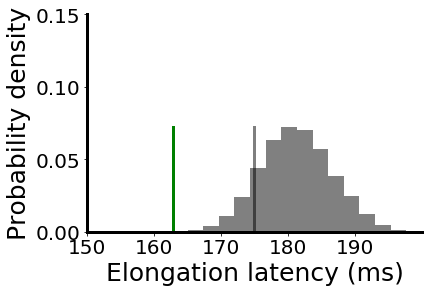

In [17]:
#### Plot tRNA shuffling
import matplotlib.pyplot as plt
import scipy.stats

elong_t_tRNA_list=np.load('RandomMinimaltRNA_FixedMinimalCodon_10ksample_elong_t_constrained.npy')
fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_tRNA_list,bins=15,range=(165,200),color='grey',density=True)
ax.plot([162.9]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([175]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5)
print(np.mean(elong_t_tRNA_list)/163)
print(np.mean(elong_t_tRNA_list), np.std(elong_t_tRNA_list))
print('z-score: ', (np.mean(elong_t_tRNA_list)-163)/np.std(elong_t_tRNA_list))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_tRNA_list)-163)/np.std(elong_t_tRNA_list))))
for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(150,200)
    ax.set_xticks(np.arange(150,200,10))
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)


In [15]:
%%time
### Codon array fixed, fast
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_100sample_elong_t_constrained.npy')
p_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_100sample_ptRNAlist_constrained.npy')

ptRNA_red20 = pd.read_excel('tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
tRNA_indices = np.flatnonzero(ptRNA_red20)
ptRNA_uniform = np.zeros(len(ptRNA_red20))
ptRNA_uniform[tRNA_indices] = 1
ptRNA_uniform = ptRNA_uniform/sum(ptRNA_uniform)
RED20_pCodon = pd.read_excel('codonValues_RED20.xlsx',header=None)
RED20_pCodon = RED20_pCodon[6]/sum(RED20_pCodon[6])

fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(RED20_pCodon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(ptRNA_red20[np.flatnonzero(ptRNA_red20)]),max(ptRNA_red20[np.flatnonzero(ptRNA_red20)]),tRNA_shuffle_indices=tRNA_indices)
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
np.save('RandomMinimaltRNA_FixedMinimalCodon_1500sample_elong_t_list2_constrained',elong_t_tRNA_list)
np.save('RandomMinimaltRNA_FixedMinimalCodon_1500sample_p_tRNA_list2_constrained',p_tRNA_list)
np.save('minelong_arr2_tRNA_minimalCodonminimaltRNA_constrained',minelong_arr)

[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010802229822616867
167.69616760471155
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010722606137201128
166.65583991645036
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010734788746412934
166.65583991645036
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010691485404024
166.65583991645036
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010647023976281372
166.65583991645036
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010605649766553253
166.65583991645036
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010561252984406019
166.65583991645036
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010530060011193589
166.65583991645036
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010502856423960417
165.45020233689905
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01052420087848275
162

0.01023821774044581
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010239156016670335
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010233243316384887
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010234819785146513
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010235358650768961
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010226636118123307
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010234679545833248
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010233940367636167
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010225722609364152
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010226533869111173
154.35626060046883
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 

0.010185609953561443
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010175926482048734
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010182310216456403
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.0101852131693
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01017647035866923
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010194852838924212
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010191372360213695
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010189008836677978
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010185731378702082
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010176895036197176
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28

0.01013842447018753
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010145178670093676
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01013978451557366
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01015215425214891
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010138472356132256
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010136935694370944
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010127070115554342
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010145341159331366
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010138312211413647
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010140247263628102
153.48741973563165
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24

0.010128848890450856
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010127664562659254
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010122355633113733
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010134006395992661
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.0101254034073224
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01012982181981
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010123616744647868
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01013173819824792
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010136087471813547
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010140215831524298
153.25924662850485
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 

0.010197898684347916
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010183059005295814
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010200099018250702
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01020375034102561
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010195099096347754
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010197631246840966
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010191255937127167
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010212894445425294
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010198194470186345
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010203332722398945
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 

0.010183607501088035
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010189934947008374
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010182328663690714
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010186830114185329
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010181852389679355
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010197692241330047
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010187841004102473
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01018463818221502
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010187516769842624
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010182575434669695
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 

0.0101818420619581
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01017253548308209
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010174221711256206
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01018380047747828
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010185142809641761
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010176839766409587
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010173112719249656
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010179575689928787
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01016347336200018
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010174795789892945
151.75727875578076
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 2

0.010157982837796394
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010163434410316703
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010163434262939572
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010166072110412943
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010163508699015715
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010174178747370994
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010158512850729107
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010160746021749658
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010153244321534518
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010163108915088535
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 

0.010161831312329693
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010139354985536322
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010153293419885946
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010152979180589728
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010147110465755824
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010144130481010111
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010149174732011108
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010143094210472346
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01014680416869007
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010145834739744479
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 3

0.010139801741384784
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010133411909511296
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010129552800195778
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010135014379681907
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010130391968609338
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010134109914204934
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010132495177803055
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010138295275974962
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010139763803942487
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010123261285198817
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 

0.010126543542922034
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010133056618341444
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010137037390854652
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010135343809109649
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010131339035669602
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010124601562351645
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010140046856027337
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010127153147064966
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010138105064651227
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.0101338385816554
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36

0.010128442906703401
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010117357540938728
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010119862611048218
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010126102496192183
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010115590883792863
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010123593791948549
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010123135574005352
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010108360834230083
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010120732366948899
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010116672364535409
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 

0.0101216761615283
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010113960118836342
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010120108913721521
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010106770407422614
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01012263216358386
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010118128757288692
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010118658537245572
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010113773228372298
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010118313160930587
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01011307906525061
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 3

0.010101035112389974
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010102013950596306
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010100784729545148
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010103871160203986
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010114283150487876
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010113387914782307
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010118106478761628
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010112339374303288
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010112466581611438
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010111852157531137
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 

0.010107248369170629
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010121749241310393
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01010090483937971
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010107777078650588
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010114229079946777
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010112084214291214
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010104740609038206
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010113603952697982
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010104579064943251
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010115868979172205
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 3

0.010094588407174969
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010114647379570163
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010117424249011561
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010105398471068805
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010108432405155587
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010106828870564046
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010109288221372706
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010106812788403918
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010107570788907637
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010101562607054075
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 

0.01011508798817104
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01010321114115987
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010105984494033734
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010104545495638268
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010106067953408342
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010112152137423393
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010099361112267032
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.0101018550426082
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01010340945443308
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010101258499127259
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37

0.010105867310336808
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01010499665371904
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010111214573111128
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010094730221286858
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010093713977476866
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010103950258904917
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010107995291226357
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01010934617656061
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.01010243240266148
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
0.010101428745910652
151.7220819809043
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 

In [16]:
%%time
### Codon array fixed, slow
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_100sample_elong_t_constrained.npy')
p_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_100sample_ptRNAlist_constrained.npy')


fitness_arr = list()
maxelong_arr = list()
elong_t_tRNA_list_arr = list()
for i in range(1500):
    maxelong_arr.append(max(elong_t_tRNA_list))
    print(i)
    print(max(elong_t_tRNA_list))
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_tRNASweep_multithread(RED20_pCodon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(ptRNA_red20[np.flatnonzero(ptRNA_red20)]),max(ptRNA_red20[np.flatnonzero(ptRNA_red20)]),fast=False,tRNA_shuffle_indices=tRNA_indices)
    fitness_arr.append(max(fitness))
    elong_t_tRNA_list_arr.append(elong_t_tRNA_list)
np.save('Slower_RandomMinimaltRNA_FixedCodon_1500sample_elong_t_list2_constrained',elong_t_tRNA_list)
np.save('Slower_RandomMinimaltRNA_FixedCodon_1500sample_p_tRNA_list2_constrained',p_tRNA_list)
np.save('Slower_maxelong_arr2-tRNA-minimaltRNA_constrained',maxelong_arr)
np.save('Slower_RandomMinimaltRNA_FixedCodon_1500sample_elong_t_list2_arr_constrained',elong_t_tRNA_list_arr)

0
198.58170252562476
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1
198.58170252562476
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
2
198.58170252562476
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
3
198.58170252562476
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
4
198.58170252562476
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
5
198.58170252562476
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
6
198.58170252562476
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
7
198.58170252562476
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
8
199.18412215439483
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
9
199.18412215439483
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
10
199.18412215439483
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
11
199.18412215439483
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
12

98
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
99
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
100
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
101
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
102
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
103
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
104
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
105
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
106
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
107
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
108
215.83937380823278
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
109
215.95292711107155
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 2

195
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
196
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
197
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
198
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
199
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
200
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
201
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
202
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
203
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
204
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
205
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
206
221.24033334565763
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23

292
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
293
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
294
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
295
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
296
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
297
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
298
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
299
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
300
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
301
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
302
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
303
225.14184107156376
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23

389
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
390
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
391
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
392
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
393
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
394
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
395
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
396
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
397
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
398
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
399
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
400
227.80702896273075
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23

486
229.15792643507834
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
487
229.15792643507834
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
488
229.15792643507834
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
489
229.15792643507834
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
490
229.15792643507834
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
491
229.15792643507834
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
492
229.9626663659344
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
493
229.9626663659344
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
494
229.9626663659344
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
495
229.9626663659344
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
496
229.9626663659344
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
497
229.9626663659344
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28

583
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
584
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
585
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
586
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
587
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
588
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
589
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
590
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
591
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
592
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
593
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
594
230.45192897981394
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23

681
232.4713196348173
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
682
232.4713196348173
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
683
232.4713196348173
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
684
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
685
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
686
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
687
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
688
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
689
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
690
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
691
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
692
232.52367552431366
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24

778
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
779
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
780
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
781
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
782
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
783
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
784
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
785
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
786
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
787
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
788
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
789
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23

875
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
876
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
877
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
878
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
879
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
880
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
881
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
882
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
883
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
884
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
885
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
886
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23

972
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
973
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
974
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
975
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
976
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
977
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
978
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
979
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
980
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
981
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
982
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
983
233.37556580828655
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23

1068
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1069
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1070
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1071
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1072
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1073
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1074
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1075
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1076
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1077
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1078
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1079
233.43734450779348
[ 0  2  6  7  8 10 11 12 14 15

1164
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1165
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1166
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1167
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1168
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1169
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1170
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1171
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1172
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1173
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1174
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1175
234.70464880442844
[ 0  2  6  7  8 10 11 12 14 15

1260
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1261
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1262
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1263
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1264
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1265
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1266
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1267
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1268
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1269
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1270
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1271
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15

1356
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1357
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1358
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1359
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1360
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1361
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1362
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1363
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1364
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1365
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1366
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1367
235.19412021000434
[ 0  2  6  7  8 10 11 12 14 15

1452
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1453
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1454
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1455
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1456
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1457
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1458
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1459
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1460
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1461
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1462
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15 18 21 22 23 24 28 32 36 37 39]
1463
235.36273970865253
[ 0  2  6  7  8 10 11 12 14 15

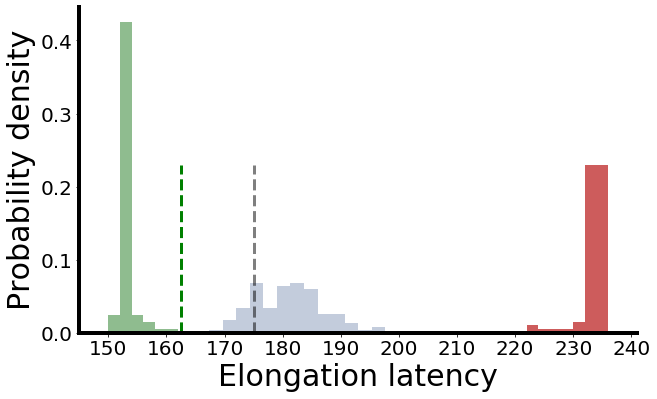

In [23]:
###Varying tRNA
fig,ax = plt.subplots(figsize=(10,6))

elong_t_tRNA_list=np.load('RandomMinimaltRNA_FixedMinimalCodon_1500sample_elong_t_list2_constrained.npy')
hist=ax.hist(elong_t_tRNA_list,15,range=(140,170),color='darkseagreen',density=True)

elong_t_tRNA_list=np.load('Slower_RandomMinimaltRNA_FixedCodon_1500sample_elong_t_list2_constrained.npy')
hist=ax.hist(elong_t_tRNA_list,15,range=(210,240),color='indianred',density=True)

ax.plot([175]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([162.5]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green',linestyle='dashed')


#p_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list.npy')
#elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_elong_t_list.npy')
#hist=ax.hist(elong_t_tRNA_list,15,range = (195,225),color='grey',density=True,alpha=0.2)

elong_t_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_100sample_elong_t.npy')
hist=ax.hist(elong_t_tRNA_list,15,range = (165,200),color='#39568CFF',density=True,alpha=0.3)


for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(145,241)
    ax.set_xticks(np.arange(150,241,10))

Text(0.5, 0, 'Epoch')

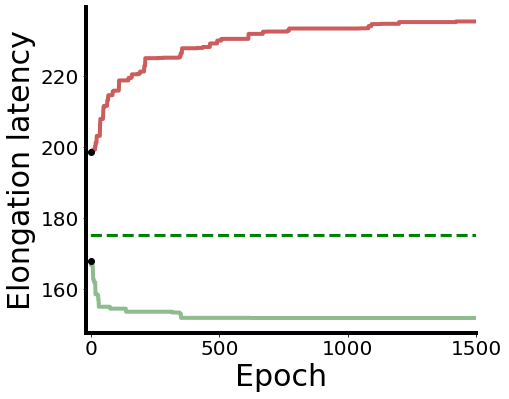

In [84]:
import matplotlib.pyplot as plt
import numpy as np
minelong = np.load('minelong_arr2_tRNA_minimalCodonminimaltRNA_constrained.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(1500),minelong,linewidth=4,color='darkseagreen')
#ax.plot(np.arange(1500),[216.6]*1500,linewidth=3,color='black',linestyle='dashed')
ax.set_xlim(-20,1500)

maxelong_slow = np.load('Slower_maxelong_arr2-tRNA-minimaltRNA_constrained.npy')
ax.plot(np.arange(1500),maxelong_slow,linewidth=4,color='indianred')
ax.plot(np.arange(1500),[175]*1500,linewidth=3,color='green',linestyle='dashed')

ax.scatter([0],maxelong_slow[0],color='black',zorder=10)
ax.scatter([0],minelong[0],color='black',zorder=10)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency',fontsize=30)
ax.set_xlabel('Epoch',fontsize=30)

[ 0.04237297 -0.01065449  0.01188578 -0.00608828 -0.01065449 -0.00608828
 -0.00152296  0.00118283 -0.0132569  -0.01217656  0.01513346  0.00611854
  0.06575481 -0.07305936 -0.00222013 -0.00158356 -0.06392694 -0.01674277
  0.06814501 -0.02739726 -0.01065449  0.05582093  0.00309284  0.00678611
  0.0005744  -0.01065449 -0.00761035 -0.00304414  0.03318842 -0.00456621
 -0.01674277 -0.01217656  0.05164565 -0.00913242 -0.01674277 -0.01978691
 -0.00282871 -0.00951976 -0.05936073  0.06649052]
1.249000902703301e-16
normed tRNA dist  0.856384562241651


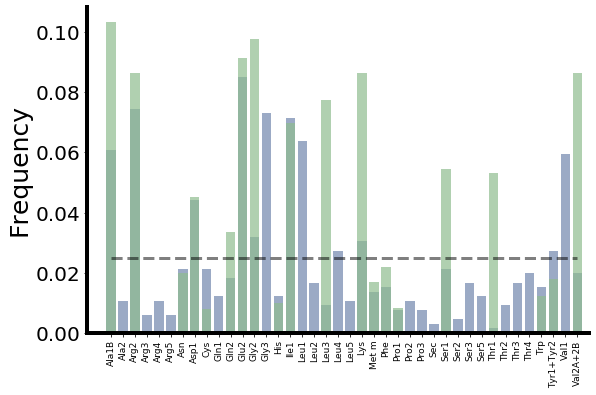

In [24]:
p_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_1500sample_p_tRNA_list2_constrained.npy')
elong_t_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_1500sample_elong_t_list2_constrained.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']

fig,ax = plt.subplots(figsize=(9,6))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)],color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))


tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

[-0.05445838 -0.01065449 -0.0590091  -0.00608828 -0.01065449 -0.00608828
  0.00169323 -0.0318257   0.14669837 -0.01217656 -0.00341702 -0.07399536
 -0.02045586 -0.07305936  0.02472453  0.03728996 -0.06392694 -0.01674277
  0.05672919 -0.02739726 -0.01065449 -0.00850787 -0.00123783 -0.00372293
  0.14694913 -0.01065449 -0.00761035 -0.00304414 -0.00429758 -0.00456621
 -0.01674277 -0.01217656  0.01341268 -0.00913242 -0.01674277 -0.01978691
  0.23988072  0.00422071 -0.05936073 -0.01341061]
1.2663481374630692e-16
normed tRNA dist  1.3431970434333067


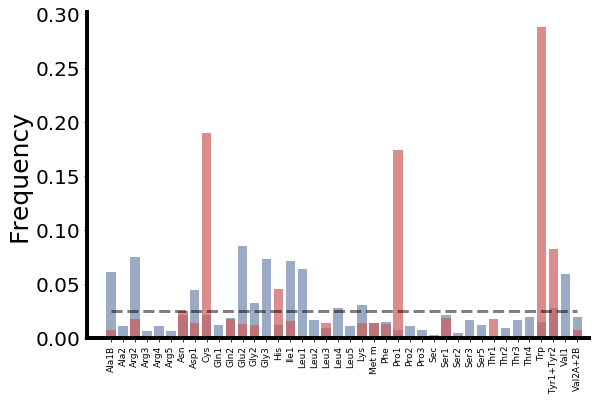

In [25]:
p_tRNA_list = np.load('Slower_RandomMinimaltRNA_FixedCodon_1500sample_p_tRNA_list2_constrained.npy')
elong_t_tRNA_list = np.load('Slower_RandomMinimaltRNA_FixedCodon_1500sample_elong_t_list2_constrained.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']

fig,ax = plt.subplots(figsize=(9,6))
ax.bar(np.arange(40),gr25_ptRNA,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmax(elong_t_tRNA_list)],color='indianred',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))


tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

R^2 0.8961987953749383
1.1781450648243836


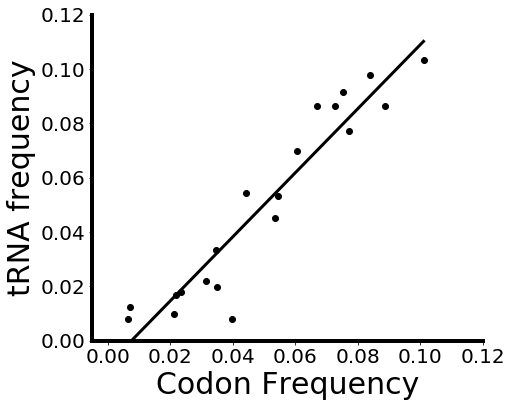

In [79]:
#### trna frequency vs codon frequency, ga faster (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


p_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_1500sample_p_tRNA_list2_constrained.npy')
elong_t_tRNA_list = np.load('RandomMinimaltRNA_FixedMinimalCodon_1500sample_elong_t_list2_constrained.npy')
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_tRNA_list[np.argmin(elong_t_tRNA_list)],RED20_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

zero_indices = np.where(np.array(codonp_sorted_p)==0)
codon_tRNA_sorted_p = np.array(codon_tRNA_sorted_p)
codon_tRNA_sorted_p[zero_indices] = [0]*len(nonzero_indices)
nonzero_indices = np.where(np.array(codonp_sorted_p)>0)
codonp_sorted_p = np.array(codonp_sorted_p)

ax.scatter(codonp_sorted_p[nonzero_indices],codon_tRNA_sorted_p[nonzero_indices],color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.12)
ax.set_xticks([0,0.02,0.04,0.06,0.08,0.10,0.12])


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

codonp_sorted_p = codonp_sorted_p[nonzero_indices]
codon_tRNA_sorted_p = codon_tRNA_sorted_p[nonzero_indices]

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

[0.10106324011085915, 0.08882842025699168, 0.08399092970521542, 0.07711766187956663, 0.07541446208112874, 0.07279415469891659, 0.06687830687830688, 0.06063995968757874, 0.0545427059712774, 0.053424036281179144, 0.044343663391282435, 0.03977828168304359, 0.03509196271101033, 0.0345578231292517, 0.03141345427059713, 0.023421516754850085, 0.021839254220206602, 0.021153943058704966, 0.00708490803728899, 0.0066213151927437645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.03977828168304359
1.5498939545620274
R^2 0.37137636605117585
-1.6824069986538916


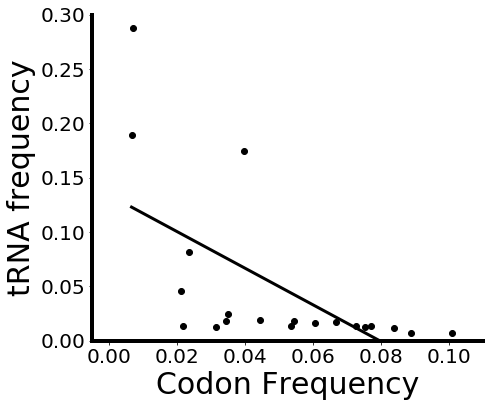

In [68]:
#### trna frequency vs codon frequency, ga slower (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


p_tRNA_list = np.load('Slower_RandomMinimaltRNA_FixedCodon_1500sample_p_tRNA_list2_constrained.npy')
elong_t_tRNA_list = np.load('Slower_RandomMinimaltRNA_FixedCodon_1500sample_elong_t_list2_constrained.npy')
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_tRNA_list[np.argmax(elong_t_tRNA_list)],RED20_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

print(codonp_sorted_p)
print(codonp_sorted_p[11])
print(sum(codon_tRNA_sorted_p))

zero_indices = np.where(np.array(codonp_sorted_p)==0)
codon_tRNA_sorted_p = np.array(codon_tRNA_sorted_p)
codon_tRNA_sorted_p[zero_indices] = [0]*len(nonzero_indices)
nonzero_indices = np.where(np.array(codonp_sorted_p)>0)
codonp_sorted_p = np.array(codonp_sorted_p)

ax.scatter(codonp_sorted_p[nonzero_indices],codon_tRNA_sorted_p[nonzero_indices],color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.11)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

codonp_sorted_p = codonp_sorted_p[nonzero_indices]
codon_tRNA_sorted_p = codon_tRNA_sorted_p[nonzero_indices]

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.30)


ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01395624, 0.04571397, 0.        , 0.01755316, 0.01755316,
       0.        , 0.        , 0.01878822, 0.01878822, 0.01296031,
       0.        , 0.        , 0.08208927, 0.18937831, 0.        ,
       0.01793351, 0.        , 0.        , 0.01615032, 0.        ,
       0.0250239 , 0.01364018, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00736158, 0.00736158, 0.00718738,
       0.        , 0.        , 0.01388074, 0.01267039, 0.        ,
       0.        , 0.01190352])

In [ ]:
def computedElongationLatency_gr3_v2_multithread(input):
    import numpy as np
    gr25_ptRNA = input[0]
    gr25_pCodon = input[1]
    gr_dict = input[2]
    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])